<a href="https://colab.research.google.com/github/Akashgundgire/seaborn_pandas_adv/blob/main/pandas_seaborn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
from google.colab import files
ploaded_file = files.upload()


In [215]:
ls

Car_sales.csv  sample_data/


In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [217]:
df=pd.read_csv("Car_sales.csv")
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


**which latest five car has Launch for which date and which the of that of vehical type ?**

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [219]:
 a=df['Latest_Launch'].sort_values()
a=a.head()
x=df.loc[a.index]

<Axes: xlabel='Manufacturer', ylabel='Latest_Launch'>

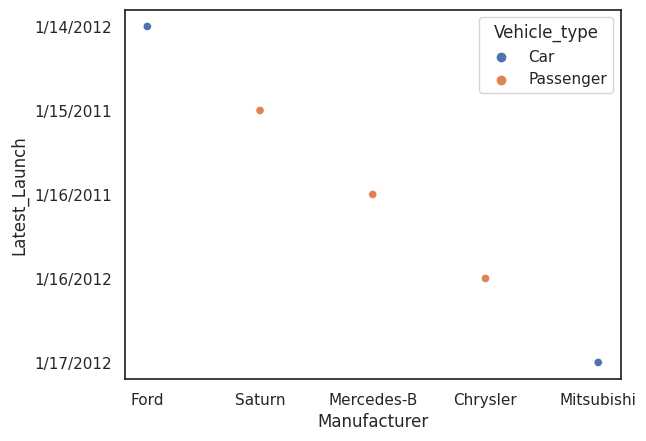

In [220]:
sns.scatterplot(x='Manufacturer',y='Latest_Launch',data=x,hue='Vehicle_type')

**which  five car have a higest Horsepower and there capacity of fuel ?**

In [221]:
x=df['Horsepower'].sort_values(ascending=False)
y=df.loc[x.index].head()
y
# p=y[['Horsepower','Fuel_capacity']]
# p

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
39,Dodge,Viper,0.916,58.470,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,8/7/2011,188.144323
24,Chevrolet,Corvette,17.947,36.225,Passenger,45.705,5.7,345.0,104.5,73.6,179.7,3.210,19.1,22.0,5/12/2012,141.141150
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
99,Mercedes-B,CL500,0.954,NaN,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,4/11/2011,141.100985
95,Mercedes-B,SL-Class,3.311,58.600,Passenger,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,3/17/2011,139.982294


<ipython-input-222-8b9b32f99332>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a=sns.barplot(x='Horsepower',y='Fuel_capacity',data=y,hue='Manufacturer',ci=None)


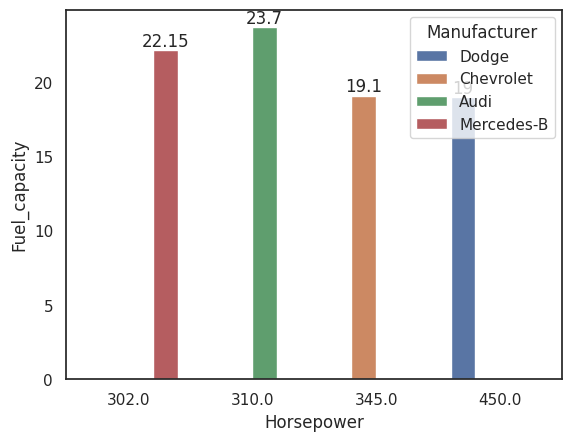

In [222]:
a=sns.barplot(x='Horsepower',y='Fuel_capacity',data=y,hue='Manufacturer',ci=None)
for i in a.containers:
  a.bar_label(i,)

**which cars available in shoroom and there counts ?**

Text(0.5, 0, 'names of car')

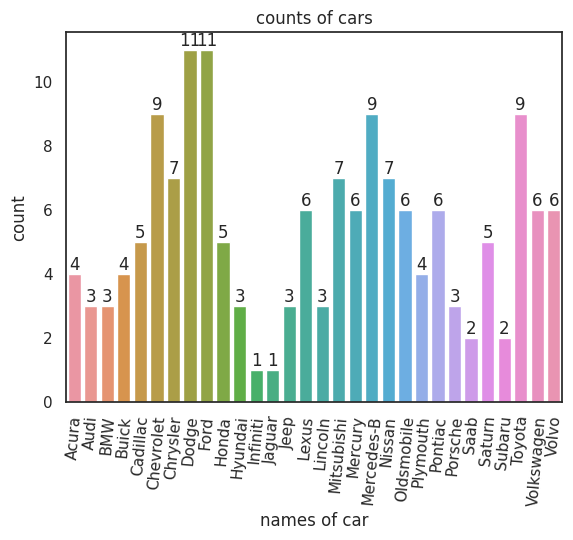

In [223]:
b=sns.countplot(x='Manufacturer', data=df)
for i in b.containers:
   b.bar_label(i,)
   plt.xticks(rotation=85)
plt.title('counts of cars')
plt.xlabel('names of car')


## which type of vehicle maximum in sale?

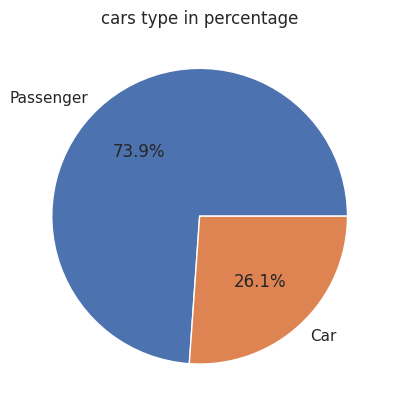

In [224]:
a=df['Vehicle_type'].value_counts()
a
plt.pie(x=a.values,data=a,labels=a.index,autopct='%1.1f%%')
plt.title('cars type in percentage')
plt.show()

## which types of Vehicle maximum Width and maximum Length?

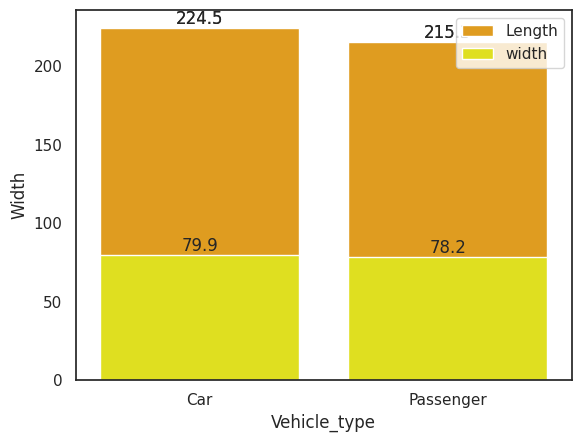

In [225]:
a=df.groupby('Vehicle_type').agg({'Width':'max','Length':'max'})
b=sns.barplot(y='Length',x=a.index,data=a,color='orange',label='Length')
for i in b.containers:
  b.bar_label(i,)
c=sns.barplot(y='Width',x=a.index,data=a,color='yellow',label='width')
for i in c.containers:
  c.bar_label(i,)
  plt.legend()

In [254]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,date,year,Year
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012-02-02,2012,2012
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011-06-03,2011,2011
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN,2012-01-04,2012,2012
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011-03-10,2011,2011
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011-10-08,2011,2011


### In the year 2012, the showroom had the following types of vehicles, and here are the percentages for each type

In [253]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['Latest_Launch'])
# Extract the year and create a new 'year' column
df['Year'] = df['date'].dt.year
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,date,year,Year
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012-02-02,2012,2012
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011-06-03,2011,2011
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN,2012-01-04,2012,2012
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011-03-10,2011,2011
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011-10-08,2011,2011


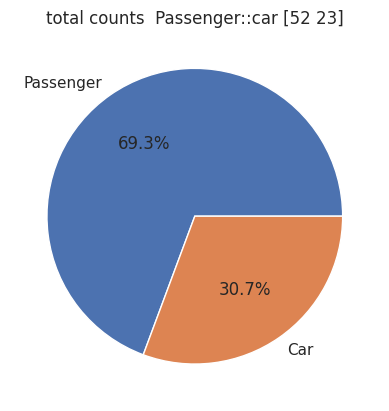

In [237]:
a=df[df['Year']==2012]
b=a['Vehicle_type'].value_counts()
plt.pie(x=b.values,data=b,labels=b.index,autopct='%1.1f%%')
plt.title('total counts  Passenger::car ' + str(b.values))
plt.show()

# sns.swarmplot(x=)

## which 5 five car have a minimum engine size and maximun horsepower

In [238]:
df.head(1)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,date,year,Year
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.28015,2012-02-02,2012,2012


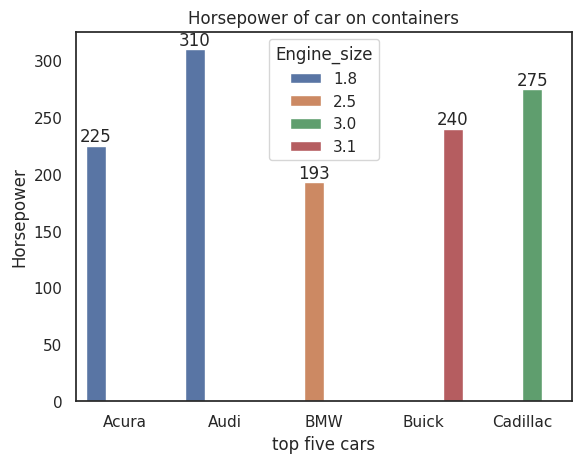

In [239]:
df.head()
ak=df.groupby('Manufacturer').agg({'Engine_size':'min','Horsepower':'max'}).head()
ak
b=sns.barplot(x=ak.index,y='Horsepower',data=ak,hue='Engine_size')
for i in b.containers:
  b.bar_label(i,)
  plt.title('Horsepower of car on containers')
  plt.xlabel('top five cars')

which type of Vehicle maximum lonch in which year ?

In [241]:
df.head(1)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,date,year,Year
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.28015,2012-02-02,2012,2012


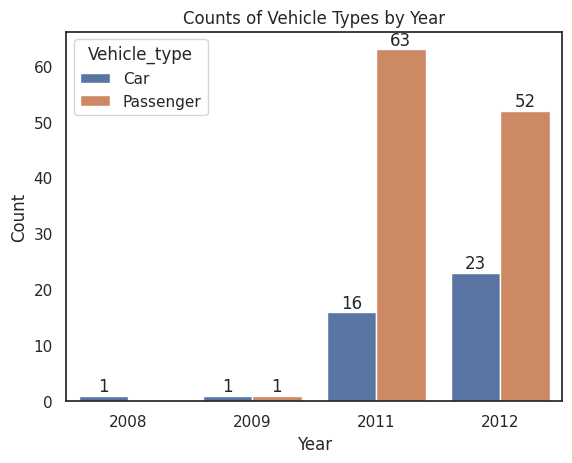

In [240]:
a = df.groupby(['Year', 'Vehicle_type']).size().reset_index(name='Count')
# cont gives op of name in columons
a
# Create the bar plot
b=sns.barplot(x='Year', y='Count', hue='Vehicle_type', data=a)
for i in b.containers:
  b.bar_label(i,)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Vehicle Types by Year')
plt.show()


## which  five cars have a minimum sales price and maximum Horsepower ?

In [246]:
df.head(1)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,date,year,Year
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.28015,2012-02-02,2012,2012


In [ ]:
ak=df.groupby('Manufacturer').agg({'Sales_in_thousands':'min','Horsepower':'max'}).head().reset_index(names='carnames')
ak
b=sns.barplot(x='Sales_in_thousands',y='Horsepower',data=ak,hue='carnames')
for i in b.containers:
  b.bar_label(i,)
plt.xlabel('Sales_in_thousands')
plt.ylabel('Horsepower')
plt.title('Bar Plot of Horsepower vs. Sales by Manufacturer')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()

which five cars  have a minimum  price and his lounch year ?

In [250]:
df.head(1)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,date,year,Year
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.28015,2012-02-02,2012,2012


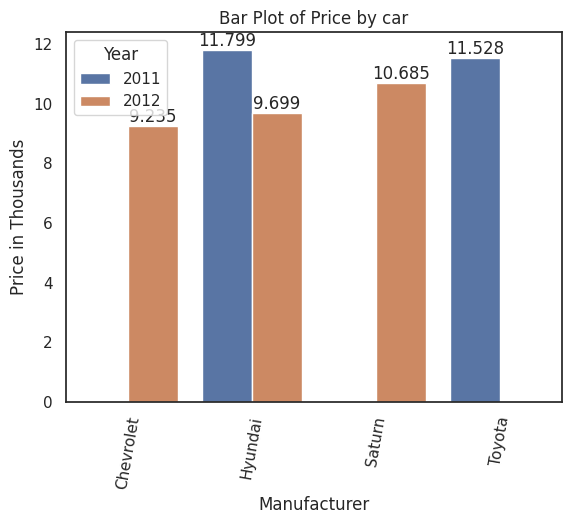

In [251]:
a=df['Price_in_thousands'].sort_values().head()
#thats for index for use
b=df.loc[a.index]
aa = b[['Manufacturer', 'Price_in_thousands', 'Year']]
b=sns.barplot(x='Manufacturer', y='Price_in_thousands', hue='Year', data=aa)
for i in b.containers:
  b.bar_label(i,)
plt.xlabel('Manufacturer')
plt.ylabel('Price in Thousands')
plt.title('Bar Plot of Price by car')
plt.xticks(rotation=80)
plt.show()
# jyanch dusara graph ala nahi to tyana five madhe min proce naho so.....

In [255]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,date,year,Year
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012-02-02,2012,2012
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011-06-03,2011,2011
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,NaN,2012-01-04,2012,2012
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011-03-10,2011,2011
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011-10-08,2011,2011


## which two cars have a Engine size	minimum Horsepower is maximum and 	Fuel capacity	maximum Power performance high ?

In [262]:
df.head(1)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,date,year,Year
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.28015,2012-02-02,2012,2012


In [270]:
a=df.groupby('Manufacturer').agg({'Engine_size':'min','Horsepower':'max','Fuel_capacity':'max','Power_perf_factor':'max'}).reset_index(names='car').head(2)
a

,car,Engine_size,Horsepower,Fuel_capacity,Power_perf_factor
0,Acura,1.8,225.0,18.0,91.389779
1,Audi,1.8,310.0,23.7,134.656858


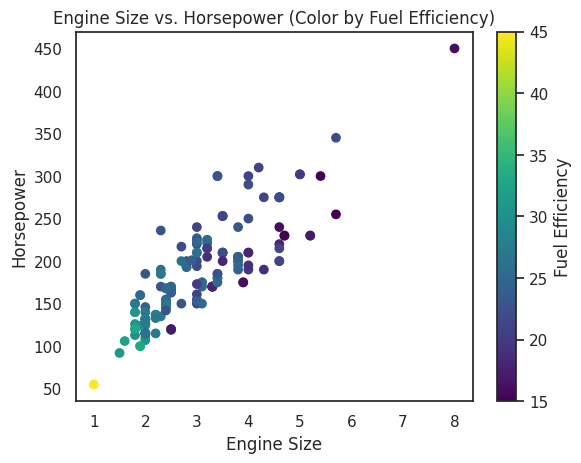

In [269]:
plt.scatter(df['Engine_size'], df['Horsepower'], c=df['Fuel_efficiency'], cmap='viridis')
plt.colorbar(label='Fuel Efficiency')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.title('Engine Size vs. Horsepower (Color by Fuel Efficiency)')
plt.show()

In [271]:
df.head(1)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,date,year,Year
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.28015,2012-02-02,2012,2012


## which In the year 2011, the showroom had the following types of vehicles, and here are the percentages for each type

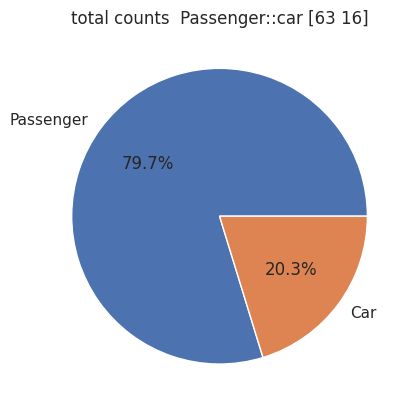

In [287]:
a=df[df['Year']==2011]
b=a['Vehicle_type'].value_counts()
plt.pie(x=b.values,data=b,labels=b.index,autopct='%1.1f%%')
plt.title('total counts  Passenger::car ' + str(b.values))
plt.show()